# **Predicitve Model to determine how many weeks it takes to sell a used car**
Team members:

*   Luis Valentin Rodriguez Gonzalez (luis_01@outlook.com)
*   Arturo Mark Chura Noriega (arturo_markk@hotmail.com)





## **I. Introduction**

The porpose of this model is to predict in which week the car will be sold once it gets into the car shop center.
 
Inside the Dataset we find the date the car was entered to the system and the last day it was seen in the car shop. We this information we can then calculate how many days/weeks it took to be sold.

## **II. Libraries and modules requirment**

### a) Installation of libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!python -m pip install --upgrade --user pip

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
!pip install scikit-learn --upgrade --user
!pip install scipy --upgrade --user
!pip install xgboost --upgrade --user
!pip install imblearn --upgrade --user
!pip install seaborn --upgrade --user
!pip install -U imbalanced-learn

print("Done")

     |████████████████████████████████| 2.1 MB 9.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 11.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.6/173.6 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Done


### b) Modules importation

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings 
import imblearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from datetime import date
import math 
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report
import xgboost as xgb
# importing the required function
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
 
print("DONE")


DONE


## **III. Data Exploration**

Fist we have to import or upload the csv files which contains all the information

In [ ]:
uploaded = files.upload()

Saving Automotive_1.csv to Automotive_1.csv


### a) Information of the given dataset

In this section we found there are features with null values

In [ ]:
# Merging csv files
df = pd.read_csv(io.BytesIO(uploaded["Automotive_1.csv"]))

# Information of our Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          200000 non-null  object
 1   name                 200000 non-null  object
 2   seller               200000 non-null  object
 3   offertype            200000 non-null  object
 4   price                200000 non-null  object
 5   abtest               199986 non-null  object
 6   vehicletype          179636 non-null  object
 7   yearofregistration   199990 non-null  object
 8   gearbox              189161 non-null  object
 9   powerps              199992 non-null  object
 10  model                188891 non-null  object
 11  kilometer            200000 non-null  int64 
 12  monthofregistration  199990 non-null  object
 13  fueltype             181927 non-null  object
 14  brand                199943 non-null  object
 15  notrepaireddamage    161206 non-nu

Showing some entries of the original Data set

In [ ]:
df.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24T00:00:00,FALSE,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24T00:00:00,FALSE,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,FALSE,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3T?ER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,golf,150000,6,benzin,volkswagen,no,2016-03-17T00:00:00,FALSE,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31T00:00:00,FALSE,60437,2016-04-06T10:17:21


### b) Conversion of object data type to numerical

We also elimindate all the rows where the column 
"price" have values of "test" or "control"

In [ ]:
# Converting
df = df[df.price != 'test']
df = df[df.price != 'control']
df["price"] = df["price"].astype(float).fillna(0.0)
df["yearofregistration"] = df["yearofregistration"].astype(str).astype(int)
df["monthofregistration"] = df["monthofregistration"].astype(str).astype(int)
df["powerps"] = df["powerps"].astype(str).astype(int)
df["postalcode"] = df["postalcode"].astype(str).astype(int)


### c) Conversion of object data type to date

We also elimindate all the rows where the column 
"datecreated" have values of "FALSE"

In [ ]:
# Converting 
df['lastseen'] = pd.to_datetime(df['lastseen']).dt.date
df['datecrawled'] = pd.to_datetime(df['datecrawled']).dt.date
df = df[df.datecreated != 'FALSE']
df['datecreated'] = pd.to_datetime(df['datecreated']).dt.date

df['lastseen'] = pd.to_datetime(df['lastseen'])
df['datecrawled'] = pd.to_datetime(df['datecrawled'])
df['datecreated'] = pd.to_datetime(df['datecreated'])

### d) Adding a new calculated column 
We want to know how many weeks it takes to sell the car. This is going to be our Target value

In [ ]:
# Check which is the last day
lastday = df['lastseen'].max()
# Compute how many days it takes to be sold
df['days_to_sell'] = (lastday - df['lastseen']).dt.days

# Function for categorization
def calculate_weeks(row):
  if row['days_to_sell'] == 0:
    return 'Remained'
  elif 0 < row['days_to_sell'] < 8:
    return '1 week'
  elif 7 < row['days_to_sell'] < 15:
    return '2 weeks'
  elif 14 < row['days_to_sell'] < 22:
    return '3 weeks'
  elif 21 < row['days_to_sell'] < 29:
    return '4 weeks'
  else:
    return 'more than 4 weeks'

# Apply function to a new calculated column
df['weeks_to_sell'] = df.apply(calculate_weeks, axis=1)

# Eliminate all the rows where the car is still remained in the car shop. It doesn't provide information to the model
df = df[df.days_to_sell != 0]

df.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,days_to_sell,weeks_to_sell
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004,automatik,163,...,8,diesel,jeep,NaN,2016-03-14,FALSE,90480,2016-04-05,2,1 week
3,2016-03-17,GOLF_4_1_4__3T?ER,privat,Angebot,1500.0,test,kleinwagen,2001,manual,75,...,6,benzin,volkswagen,no,2016-03-17,FALSE,91074,2016-03-17,21,3 weeks
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manual,69,...,7,diesel,skoda,no,2016-03-31,FALSE,60437,2016-04-06,1,1 week
5,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manual,102,...,10,benzin,bmw,yes,2016-04-04,FALSE,33775,2016-04-06,1,1 week
6,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004,manual,109,...,8,benzin,peugeot,no,2016-04-01,FALSE,67112,2016-04-05,2,1 week


### e) Distribution plots of different variables

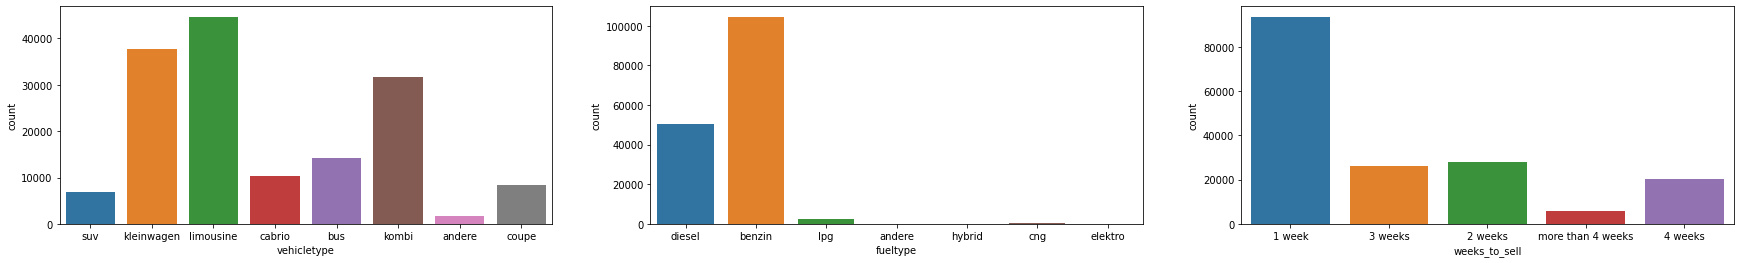

In [ ]:
plt.figure(figsize=(30,4))
plt.subplot(1,3,1)
sns.countplot(x="vehicletype", data=df)
plt.subplot(1,3,2)
sns.countplot(x="fueltype", data=df)
plt.subplot(1,3,3)
sns.countplot(x="weeks_to_sell", data=df)

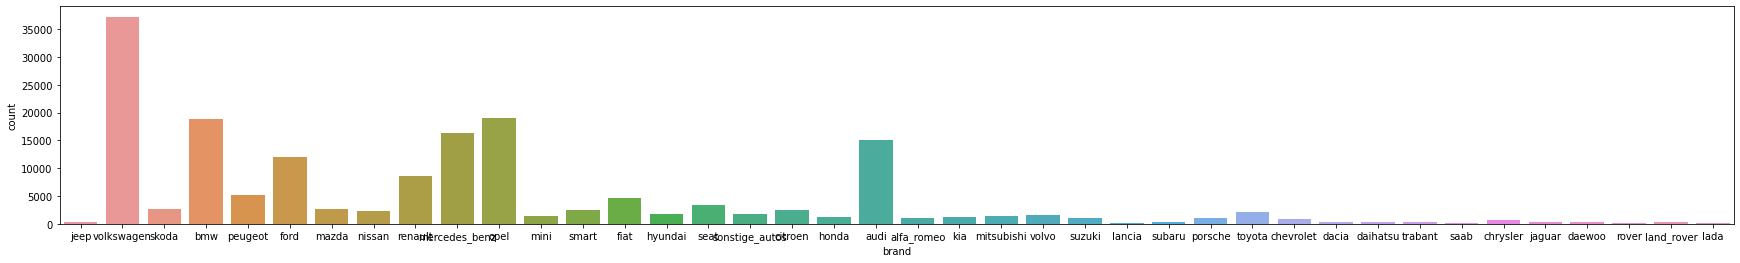

In [ ]:
plt.figure(figsize=(30,4))
sns.countplot(x="brand", data=df)

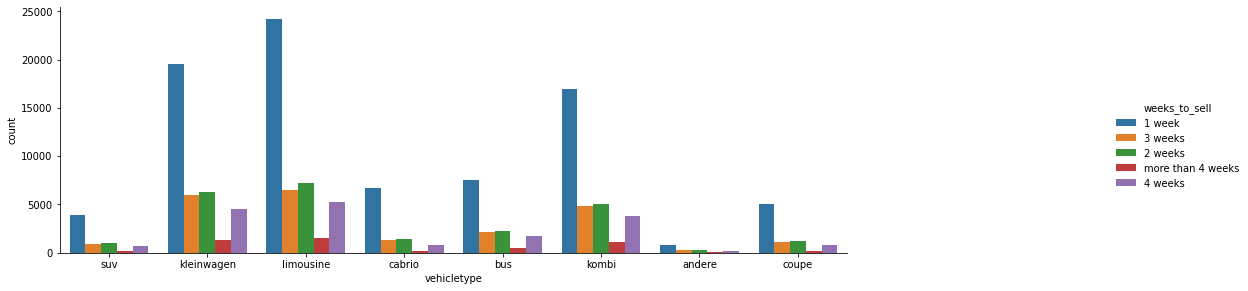

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [ ]:
g = sns.catplot(x="vehicletype", hue="weeks_to_sell", kind="count", data=df)
g.fig.set_figwidth(20)
g.fig.set_figheight(4)
plt.show()
plt.figure(figsize=(20,4))

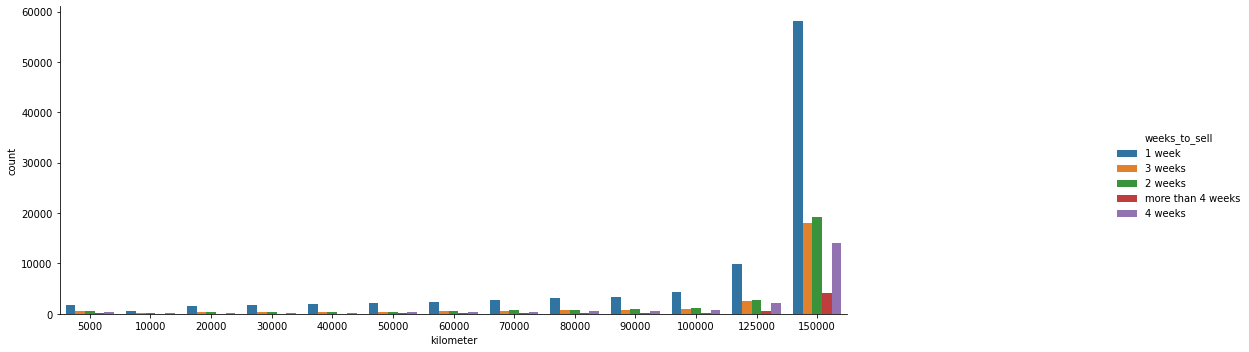

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [ ]:
g = sns.catplot(x="kilometer", hue="weeks_to_sell", kind="count", data=df)
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
plt.show()
plt.figure(figsize=(20,5))

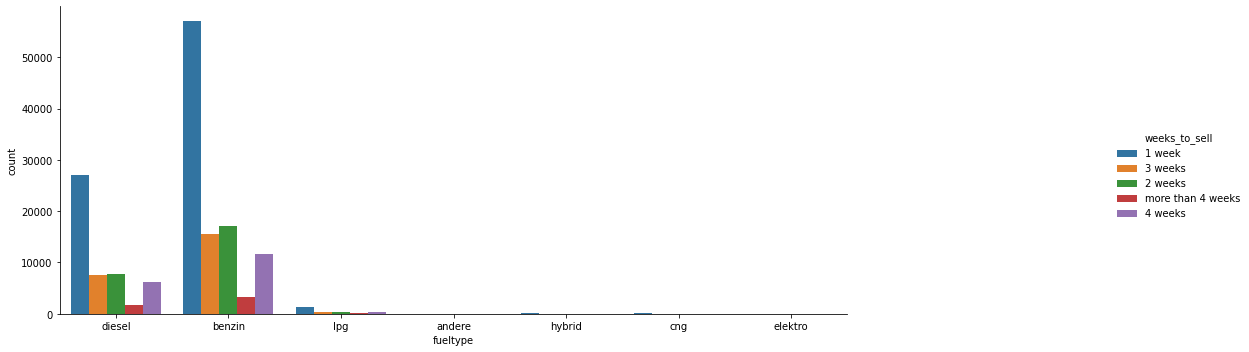

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [ ]:
g = sns.catplot(x="fueltype", hue="weeks_to_sell", kind="count", data=df)
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
plt.show()
plt.figure(figsize=(20,5))

### f) Basic Statistical indicators of the Features

In [ ]:
df.describe()

,price,yearofregistration,powerps,kilometer,monthofregistration,postalcode,days_to_sell
count,1.737340e+05,173734.000000,173734.000000,173734.000000,173734.000000,173734.000000,173734.000000
mean,2.486018e+04,2004.434762,114.583081,126212.802330,5.724988,50536.615838,9.585493
std,5.207043e+06,89.637657,195.889613,39669.699879,3.718477,25689.646280,9.170561
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000,1.000000
25%,1.100000e+03,1999.000000,69.000000,125000.000000,3.000000,30419.000000,1.000000
50%,2.800000e+03,2003.000000,105.000000,150000.000000,6.000000,49419.000000,6.000000
75%,6.900000e+03,2008.000000,147.000000,150000.000000,9.000000,71069.000000,17.000000
max,2.147484e+09,9999.000000,19208.000000,150000.000000,12.000000,99998.000000,33.000000


## **IV. Data Cleasing and Feature Engineering**

### a) Outliers detection and removing

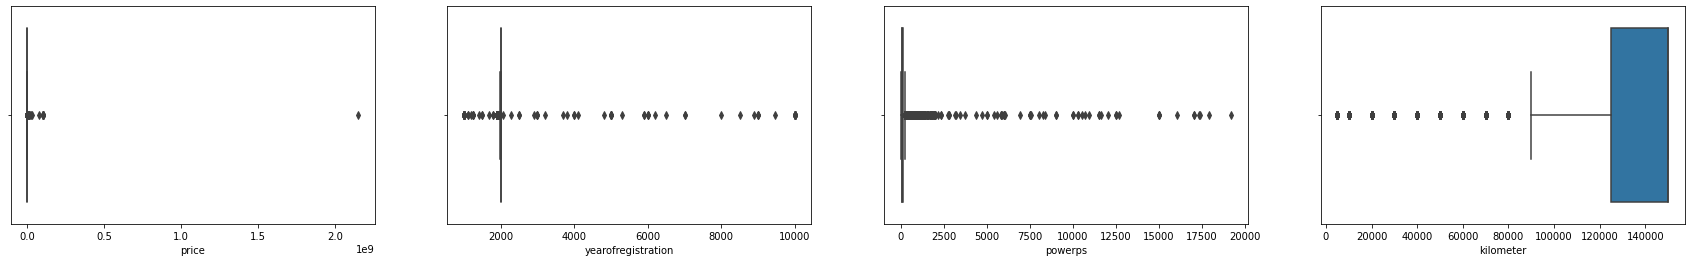

In [ ]:
plt.figure(figsize=(30,4))
plt.subplot(1,4,1)
sns.boxplot(x=df['price'])
plt.subplot(1,4,2)
sns.boxplot(x=df['yearofregistration'])
plt.subplot(1,4,3)
sns.boxplot(x=df['powerps'])
plt.subplot(1,4,4)
sns.boxplot(x=df['kilometer'])

In [ ]:
# Removing of outliers based on box plots
df = df[df.price < 50000]
df = df[df.yearofregistration > 1980]
df = df[df.yearofregistration < 2022]
df = df[df.powerps < 1000]
df = df[df.kilometer > 25000]

### b) Feature Selection
#### 1. Correlation of numerical variables with a Correlation Matrix

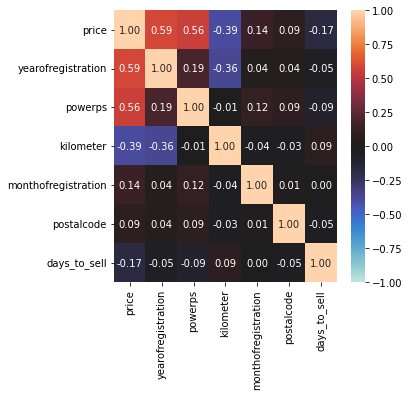

In [ ]:
corr = df.corr(method='spearman')
# Create graphical matrix of correlations
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot=True, fmt=".2f", vmax=1, vmin=-1, center=0)

#### 2. Chi square Test for categorical variables

In [ ]:
CrosstabResult = []

# Cross tabulation between Brand and weeks_to_sell
CrosstabResult.append(pd.crosstab(index=df['brand'],columns=df['weeks_to_sell']))
CrosstabResult.append(pd.crosstab(index=df['model'],columns=df['weeks_to_sell']))
CrosstabResult.append(pd.crosstab(index=df['vehicletype'],columns=df['weeks_to_sell']))
CrosstabResult.append(pd.crosstab(index=df['fueltype'],columns=df['weeks_to_sell']))
 
# P-Value is the Probability of H0 being True
# If P-Value < 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test for Brand is:', chi2_contingency(CrosstabResult[0])[1])
print('\nThe P-Value of the ChiSq Test for Model is:', chi2_contingency(CrosstabResult[1])[1])
print('\nThe P-Value of the ChiSq Test for VehicleType is:', chi2_contingency(CrosstabResult[2])[1])
print('\nThe P-Value of the ChiSq Test for FuelType is:', chi2_contingency(CrosstabResult[3])[1])

The P-Value of the ChiSq Test for Brand is: 2.5839288249737756e-63

The P-Value of the ChiSq Test for Model is: 1.0745088609955618e-89

The P-Value of the ChiSq Test for VehicleType is: 7.383900668615332e-122

The P-Value of the ChiSq Test for FuelType is: 2.4748905221976543e-08


#### 3. Feature Dropping
We remove columns where we think they don't have special impact in the model


In [ ]:
df = df.drop(columns=['datecrawled', 'name', 'monthofregistration', 'datecreated', 'lastseen', 'days_to_sell'], inplace=False)
df = df.drop(columns=['model', 'nrofpictures', 'postalcode'], inplace=False)
df = df.dropna()
df.head()

,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,kilometer,fueltype,brand,notrepaireddamage,weeks_to_sell
3,privat,Angebot,1500.0,test,kleinwagen,2001,manual,75,150000,benzin,volkswagen,no,3 weeks
4,privat,Angebot,3600.0,test,kleinwagen,2008,manual,69,90000,diesel,skoda,no,1 week
5,privat,Angebot,650.0,test,limousine,1995,manual,102,150000,benzin,bmw,yes,1 week
6,privat,Angebot,2200.0,test,cabrio,2004,manual,109,150000,benzin,peugeot,no,1 week
10,privat,Angebot,2000.0,control,limousine,2004,manual,105,150000,benzin,mazda,no,1 week


### c) Categorical variables encoding
First we check the number of uniques values for each feature

In [ ]:
df.nunique()

seller                   2
offertype                2
price                 3261
abtest                   2
vehicletype              8
yearofregistration      38
gearbox                  2
powerps                431
kilometer               10
fueltype                 7
brand                   40
notrepaireddamage        2
weeks_to_sell            5
dtype: int64

#### 1. OneHot enconding for variables with onl 2 categories

In [ ]:
ohe = OneHotEncoder(categories='auto', drop='if_binary',sparse=False)

df['seller_privat'] = pd.DataFrame(ohe.fit_transform(df[['seller']])).values
df['offertype_Gesuch'] = pd.DataFrame(ohe.fit_transform(df[['offertype']])).values
df['abtest_test'] = pd.DataFrame(ohe.fit_transform(df[['abtest']])).values
df['gearbox_manual'] = pd.DataFrame(ohe.fit_transform(df[['gearbox']])).values
df['notrepaireddamage_yes'] = pd.DataFrame(ohe.fit_transform(df[['notrepaireddamage']])).values
df = df.drop(columns=['seller', 'offertype', 'abtest', 'gearbox', 'notrepaireddamage'], inplace=False)
df.head()

,price,vehicletype,yearofregistration,powerps,kilometer,fueltype,brand,weeks_to_sell,seller_privat,offertype_Gesuch,abtest_test,gearbox_manual,notrepaireddamage_yes
3,1500.0,kleinwagen,2001,75,150000,benzin,volkswagen,3 weeks,1.0,0.0,1.0,1.0,0.0
4,3600.0,kleinwagen,2008,69,90000,diesel,skoda,1 week,1.0,0.0,1.0,1.0,0.0
5,650.0,limousine,1995,102,150000,benzin,bmw,1 week,1.0,0.0,1.0,1.0,1.0
6,2200.0,cabrio,2004,109,150000,benzin,peugeot,1 week,1.0,0.0,1.0,1.0,0.0
10,2000.0,limousine,2004,105,150000,benzin,mazda,1 week,1.0,0.0,0.0,1.0,0.0


#### 2. Dummy encoding for variables with more than 2 categories

In [ ]:
df2 = pd.get_dummies(df, columns=['brand'])
df2 = pd.get_dummies(df2, columns=['vehicletype'])
df2 = pd.get_dummies(df2, columns=['fueltype'])
# df2 = df2.drop(columns=['brand'], inplace=False)

# shift column to last position
column = df2.pop('weeks_to_sell')

# insert column using insert(position,column_name, first_column) function
df2.insert(len(df2.columns), 'weeks_to_sell', column)
df2

,price,yearofregistration,powerps,kilometer,seller_privat,offertype_Gesuch,abtest_test,gearbox_manual,notrepaireddamage_yes,brand_alfa_romeo,...,vehicletype_limousine,vehicletype_suv,fueltype_andere,fueltype_benzin,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,weeks_to_sell
3,1500.0,2001,75,150000,1.0,0.0,1.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,3 weeks
4,3600.0,2008,69,90000,1.0,0.0,1.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1 week
5,650.0,1995,102,150000,1.0,0.0,1.0,1.0,1.0,0,...,1,0,0,1,0,0,0,0,0,1 week
6,2200.0,2004,109,150000,1.0,0.0,1.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1 week
10,2000.0,2004,105,150000,1.0,0.0,0.0,1.0,0.0,0,...,1,0,0,1,0,0,0,0,0,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,4900.0,1992,150,150000,1.0,0.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1 week
199994,2199.0,2001,50,150000,1.0,0.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,3 weeks
199996,600.0,1998,116,150000,1.0,0.0,0.0,1.0,0.0,0,...,1,0,0,1,0,0,0,0,0,more than 4 weeks
199998,11400.0,2012,110,125000,1.0,0.0,1.0,1.0,0.0,0,...,0,1,0,0,0,1,0,0,0,1 week


### d) Data partitioning

In [ ]:
target = df2.weeks_to_sell
features = df2.drop('weeks_to_sell', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123)

### e) Imbalanced data resolution
We use the SMOTE- NC function to upsampling the categorioes with minor data. This method create synthetic data to upsample.

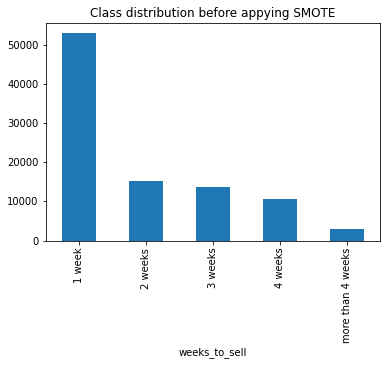

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='weeks_to_sell')

In [ ]:
#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
#Create the oversampler. 
smotenc = SMOTENC([*range(4,64)], random_state = 123)

X_train, y_train = smotenc.fit_resample(X_train, y_train)

After aplying the SMOTE-NC function for upsampling, we found we have a balanced data.

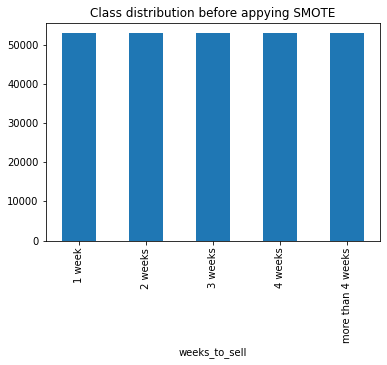

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='weeks_to_sell')

### f) Data transformation: Scaling numerical features

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **V. Model selection and Comparison**

### a) Random Forest

In [ ]:
# RandomForest instance creation
clf1 = RandomForestClassifier(random_state=123)
clf1.fit(X_train, y_train)

#score computing
clf1.score(X_test, y_test)


0.4059248069822088

In [ ]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['1 week', '2 weeks', '3 weeks', '4 weeks', ' more than 4 weeks']))

                    precision    recall  f1-score   support

            1 week       0.61      0.59      0.60     13257
           2 weeks       0.19      0.20      0.19      3633
           3 weeks       0.20      0.19      0.19      3576
           4 weeks       0.16      0.17      0.16      2604
 more than 4 weeks       0.06      0.10      0.08       762

          accuracy                           0.41     23832
         macro avg       0.24      0.25      0.25     23832
      weighted avg       0.42      0.41      0.41     23832



### b) XG Bosst

In [ ]:
# XGBoost instance creation
clf2 = xgb.XGBClassifier(random_state=123)
clf2.fit(X_train, y_train)

#score computing
clf2.score(X_test, y_test)

0.3261581067472306

In [ ]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['1 week', '2 weeks', '3 weeks', '4 weeks', ' more than 4 weeks']))

                    precision    recall  f1-score   support

            1 week       0.63      0.50      0.55     13257
           2 weeks       0.17      0.06      0.09      3633
           3 weeks       0.17      0.05      0.08      3576
           4 weeks       0.14      0.17      0.15      2604
 more than 4 weeks       0.04      0.41      0.08       762

          accuracy                           0.33     23832
         macro avg       0.23      0.24      0.19     23832
      weighted avg       0.42      0.33      0.35     23832



### c) Multi-layer Perceptron

In [ ]:
clf3 = MLPClassifier(max_iter=1500)
clf3.fit(X_train, y_train)

#score computing
clf3.score(X_test, y_test)

0.2973732796240349

In [ ]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['1 week', '2 weeks', '3 weeks', '4 weeks', ' more than 4 weeks']))

                    precision    recall  f1-score   support

            1 week       0.65      0.39      0.49     13257
           2 weeks       0.17      0.14      0.15      3633
           3 weeks       0.16      0.17      0.16      3576
           4 weeks       0.13      0.21      0.16      2604
 more than 4 weeks       0.04      0.27      0.07       762

          accuracy                           0.30     23832
         macro avg       0.23      0.24      0.21     23832
      weighted avg       0.43      0.30      0.34     23832



## **VI. Selected Model Evaluation and Conclusion**

We visualize the confusion matrix from the Random Forest model we selected.

<Figure size 3.6x5.04 with 0 Axes>

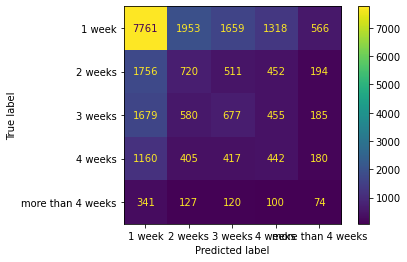

In [ ]:
plt.figure(figsize=(0.05,0.07))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

We checked and compare the accuracy and the recall metrics to verify which model would be better for this specific problem. As the metrics from the Random Forest model show better recall and better accuracy overall, we decide to take this model as the best fit for this solution. 

Although there are so deficiencies in detecting if a car will be sold after 2 weeks, we can see that has a better performance at predicting if a car will be sold within the first week. 